# General Notebook

In [2]:
seed = 123
import os
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import random
import torch
random.seed(seed)     # python random generator
np.random.seed(seed)  # numpy random generator

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [3]:

# Change the name to create or load the data and models
path = os.getcwd()
folder_data = r'Data\data_mlsp_semi'
#-------------------------------
if torch.cuda.is_available():  
    device = "cuda:0" 
else:  
    device = "cpu"  
print(device)

cpu


## Data

In [4]:
#--------------------------------------------
# 0: Vaquita girada
# 1: Cow     2: Human 
# 3: Horse   4: Camel
# 5: Dog1    6: Dog2
idx  = 6 #! Id image
p = 60 #! porcentage of missing labels  options: [40, 60, 80, 100]
names = ['bull', 'cow', 'human', 'horse', 'camel', 'dog1', 'dog2']
name_image = names[idx]+str(p)
print(name_image)

dog260


In [5]:
#!  Pay attention to idx when we read the data 
x1 = plt.imread(os.path.join(path, folder_data, 'x{}.png'.format(idx+1)))
m, n = x1.shape
y_true = plt.imread(os.path.join(path, folder_data, 'y{}.png'.format(idx+1))).reshape(m*n, 1)
y1 =  np.load(os.path.join(path, folder_data, 'y_miss_{}.npy'.format(p)))[idx].reshape(m*n, 1)
x = torch.tensor(x1.reshape(m*n, 1), dtype=torch.float32)
y = torch.tensor(y1, dtype=torch.float32)
x = x.to(device)
y = y.to(device)

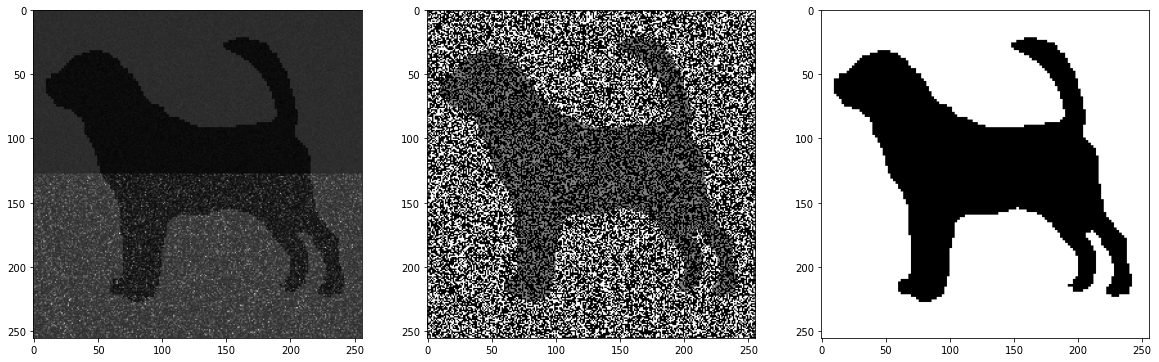

In [6]:
fig = plt.figure(figsize=(20, 30))  
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(x1, cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.imshow(y1.reshape(m,n), cmap='gray')
fig.add_subplot(rows, columns, 3)
plt.imshow(y_true.reshape(m,n), cmap='gray')

## Functions and models

In [7]:
from models.SVRNN import SVRNN
from models.SVRNN_2 import SVRNN_2
from models.VSL import VSL
from models.TMM import TMM
from models.TMM_3 import TMM_3
from utils.training import final_model, run_model_seq, num_param, plot_loss_epoch

# Models

In [8]:
# General Parameters (we do not change the values of these parameters during the simulations)
x_dim = 1
y_dim = 1
# Parameters for the models
learning_rate = 0.005 # ! We can change this parameter but change the information in the sheet annotation
weight_decay_ = 1e-4
n_epochs = 100
clip = 10
# Parameters for printing and saving the results
#! Change this path for your own path to save the results 
print_every = 1
save_every = 5
# general_path  = os.path.join(os.getcwd(), 'Results_save_models') #! Any
general_path = r'C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models' #! University
# general_path = r"C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models" #! Home
print('Saving our model in',general_path)


Saving our model in C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models


## VLS

In [8]:
# Dimension of latent variables
z_dim = 1
h_dim = 14#None # This value is not necessary for the TMM model but we need to define it for TMM_3
num_neurons = 41 #? == h_dim?
add_loss = False
#--------------------------------------------
#! Change here if the model is the same but with different parameters
setting = '_l{}'.format(int(add_loss))+'' #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
#--------------------------------------------
# model = TMM(x_dim, z_dim, y_dim, num_neurons, device, add_loss)
model = VSL( x_dim, z_dim, y_dim, h_dim, num_neurons, device)
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')



VSL has 5383 parameters to train
z_dim = 1, num_neurons = 41, h_dim = 14
Actual path to save our models for vsl_camel60_l0 is 
 C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\vsl_camel60_l0 


In [9]:
#* Training
#* epoch_init = 1 by default
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\vsl_camel60_l0\vsl


c:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\utils\training.py:67: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: 18289.423828 	 Loss Unlabeled: -51666.703125
Loss Labeled: 18195.019531 	 Loss Unlabeled: -62701.550781
Loss Labeled: 18094.457031 	 Loss Unlabeled: -71030.171875
Loss Labeled: 18066.486328 	 Loss Unlabeled: -77300.437500
Loss Labeled: 17982.408203 	 Loss Unlabeled: -81525.578125
Loss Labeled: 17929.703125 	 Loss Unlabeled: -84415.867188
Loss Labeled: 17887.804688 	 Loss Unlabeled: -87446.476562
Loss Labeled: 17863.406250 	 Loss Unlabeled: -91281.703125
Loss Labeled: 17896.810547 	 Loss Unlabeled: -95938.140625
Loss Labeled: 17864.412109 	 Loss Unlabeled: -101622.023438
Loss Labeled: 17864.306641 	 Loss Unlabeled: -108219.117188
Loss Labeled: 17851.509766 	 Loss Unlabeled: -115067.367188
Loss Labeled: 17866.908203 	 Loss Unlabeled: -121858.687500
Loss Labeled: 17850.664062 	 Loss Unlabeled: -128618.171875
Loss Labeled: 17847.693359 	 Loss Unlabeled: -135722.187500
Loss Labeled: 17829.556641 	 Loss Unlabeled: -143896.218750
Loss Labeled: 17842.109375 	 Loss Unlabeled: -152

In [10]:
#* Training
#* epoch_init = 1 by default
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\vsl_camel40_l0\vsl


c:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\utils\training.py:46: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: 27098.519531 	 Loss Unlabeled: -53887.101562
Loss Labeled: 26952.679688 	 Loss Unlabeled: -76294.023438
Loss Labeled: 26902.351562 	 Loss Unlabeled: -91094.531250
Loss Labeled: 26876.755859 	 Loss Unlabeled: -100020.968750
Loss Labeled: 26863.066406 	 Loss Unlabeled: -104170.585938
Loss Labeled: 26868.666016 	 Loss Unlabeled: -110259.320312
Loss Labeled: 26873.912109 	 Loss Unlabeled: -120095.289062
Loss Labeled: 26864.042969 	 Loss Unlabeled: -131694.578125
Loss Labeled: 26869.638672 	 Loss Unlabeled: -141979.625000
Loss Labeled: 26878.076172 	 Loss Unlabeled: -149720.515625
Loss Labeled: 26883.396484 	 Loss Unlabeled: -158263.359375
Loss Labeled: 26901.162109 	 Loss Unlabeled: -170885.187500
Loss Labeled: 26911.087891 	 Loss Unlabeled: -180383.687500
Loss Labeled: 26913.515625 	 Loss Unlabeled: -181467.328125
Loss Labeled: 26914.669922 	 Loss Unlabeled: -185679.562500
Loss Labeled: 26919.992188 	 Loss Unlabeled: -182231.203125
Loss Labeled: 26907.658203 	 Loss Unlabeled

Actual  path for to initialize our models:  C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\vsl_camel60_l0
C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\vsl_camel60_l0\vsl_state_100.pth
Initialization of the VSL model  at epoch 100
loss: -2452.40625 and epoch: 100


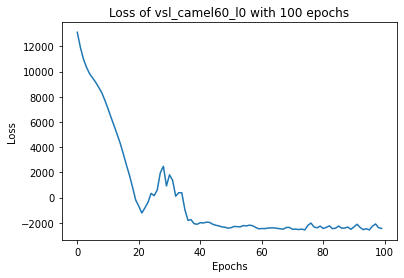

In [10]:
# #* Initialization of the model in an specific epoch
model.to(device)
epoch_init = 100
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device=device)
loss = plot_loss_epoch(model, path_save,data, epoch_init)
#loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


In [11]:
# #* Reconstruction
y_ = model.reconstruction(x,y)
# y_ = model.sample(x,y).cpu()
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

camel60: VSL with  5383 parameters 
 after 100 has an error rate of 0.4179517796803943
 folder vsl_camel60_l0


## TMM

In [9]:
# Dimension of latent variables
z_dim = 1
h_dim = 14#None # This value is not necessary for the TMM model but we need to define it for TMM_3
num_neurons = 25 #? == h_dim?
add_loss = True
#--------------------------------------------
#! Change here if the model is the same but with different parameters
setting = '_l{}'.format(int(add_loss))+'' #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
#--------------------------------------------
# model = TMM(x_dim, z_dim, y_dim, num_neurons, device, add_loss)
model = TMM_3(x_dim, z_dim, y_dim, h_dim, num_neurons, device, add_loss)


In [10]:
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')


TMM_3 has 5346 parameters to train
z_dim = 1, num_neurons = 25, h_dim = 14
Actual path to save our models for tmm_3_dog260_l1 is 
 C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_3_dog260_l1 


### Training

In [20]:
#* Training
#* epoch_init = 1 by default
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_3_dog260_l1\tmm_3


c:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\utils\training.py:67: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: -5999.820312 	 Loss Unlabeled: -38030.835938
Loss Labeled: -10270.716797 	 Loss Unlabeled: -43944.105469
Loss Labeled: -13330.203125 	 Loss Unlabeled: -48115.347656
Loss Labeled: -15709.148438 	 Loss Unlabeled: -51226.046875
Loss Labeled: -17625.630859 	 Loss Unlabeled: -53697.406250
Loss Labeled: -19207.015625 	 Loss Unlabeled: -55744.914062
Loss Labeled: -20629.195312 	 Loss Unlabeled: -57578.605469
Loss Labeled: -22101.529297 	 Loss Unlabeled: -59438.742188
Loss Labeled: -23867.832031 	 Loss Unlabeled: -61558.722656
Loss Labeled: -25958.527344 	 Loss Unlabeled: -64007.375000
Loss Labeled: -28260.808594 	 Loss Unlabeled: -66781.031250
Loss Labeled: -30842.515625 	 Loss Unlabeled: -69712.015625
Loss Labeled: -33478.535156 	 Loss Unlabeled: -72784.414062
Loss Labeled: -36289.421875 	 Loss Unlabeled: -76121.578125
Loss Labeled: -39136.746094 	 Loss Unlabeled: -79632.140625
Loss Labeled: -42007.671875 	 Loss Unlabeled: -83557.125000
Loss Labeled: -44609.230469 	 Loss Unlabe

### Initialization from a specific epoch 

Actual  path for to initialize our models:  C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_3_dog260_l1
C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_3_dog260_l1\tmm_3_state_55.pth
Initialization of the TMM_3 model  at epoch 55
loss: -166465.9375 and epoch: 55


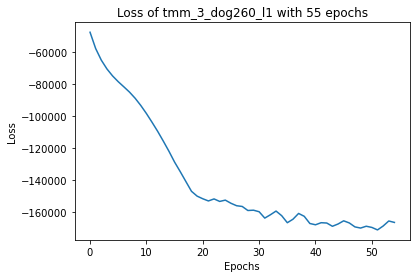

array([ -47835.953125 ,  -58020.8515625,  -65257.203125 ,  -70735.3203125,
        -75089.171875 ,  -78677.4296875,  -81889.0703125,  -85174.328125 ,
        -89012.390625 ,  -93502.375    ,  -98529.6875   , -103995.4140625,
       -109659.3046875, -115763.828125 , -122083.8671875, -128843.515625 ,
       -134776.703125 , -140939.1875   , -147062.96875  , -150070.171875 ,
       -151702.8125   , -153069.015625 , -151808.78125  , -153372.546875 ,
       -152556.984375 , -154522.484375 , -156046.703125 , -156512.5      ,
       -159024.25     , -158838.109375 , -159807.6875   , -163770.828125 ,
       -161685.421875 , -159384.96875  , -162258.25     , -166651.40625  ,
       -164480.625    , -160864.75     , -162646.65625  , -167136.953125 ,
       -167935.375    , -166645.921875 , -166841.171875 , -168875.25     ,
       -167452.390625 , -165464.4375   , -166805.40625  , -169259.671875 ,
       -169978.828125 , -168843.609375 , -169583.359375 , -171140.484375 ,
       -168718.375    , -

In [11]:
# #* Initialization of the model in an specific epoch
model.to(device)
epoch_init = 55
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device=device)
plot_loss_epoch(model, path_save,data, epoch_init)
#loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


### Reconstruction image

In [12]:
# #* Reconstruction
y_ = model.reconstruction(x,y)
# y_ = model.sample(x,y).cpu()
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

dog260: TMM_3 with  5346 parameters 
 after 55 has an error rate of 0.34290506200447246
 folder tmm_3_dog260_l1


## SVRNN

In [9]:
# Dimension of latent variables
z_dim = 1
h_dim = 14 # This value is not necessary for the TMM model
num_neurons = 22 #? == h_dim?
add_loss = True
#--------------------------------------------
#! Change here if the model is the same but with different parameters
setting = '_l{}_11'.format(int(add_loss)) #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
#--------------------------------------------
model = SVRNN_2(x_dim, z_dim, h_dim, y_dim, num_neurons, device, add_loss)

### Execution

In [10]:
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')


SVRNN_2 has 5240 parameters to train
z_dim = 1, num_neurons = 22, h_dim = 14
Actual path to save our models for svrnn_2_camel40_l1_11 is 
 C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\svrnn_2_camel40_l1_11 


In [11]:
#* Training
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\svrnn_2_camel40_l1_11\svrnn_2


c:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\utils\training.py:46: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: -14616.144531 	 Loss Unlabeled: -27570.970703
Loss Labeled: -19358.306641 	 Loss Unlabeled: -30540.593750
Loss Labeled: -22835.601562 	 Loss Unlabeled: -32750.748047
Loss Labeled: -25460.154297 	 Loss Unlabeled: -34414.789062
Loss Labeled: -27944.664062 	 Loss Unlabeled: -35979.632812
Loss Labeled: -30519.986328 	 Loss Unlabeled: -37572.585938
Loss Labeled: -32971.648438 	 Loss Unlabeled: -39068.500000
Loss Labeled: -34942.226562 	 Loss Unlabeled: -40284.328125
Loss Labeled: -36492.562500 	 Loss Unlabeled: -41270.707031
Loss Labeled: -38252.773438 	 Loss Unlabeled: -42421.136719
Loss Labeled: -40773.789062 	 Loss Unlabeled: -44039.339844
Loss Labeled: -44501.796875 	 Loss Unlabeled: -46280.308594
Loss Labeled: -49127.273438 	 Loss Unlabeled: -49004.101562
Loss Labeled: -54179.046875 	 Loss Unlabeled: -51987.312500
Loss Labeled: -59327.335938 	 Loss Unlabeled: -55330.847656
Loss Labeled: -64201.195312 	 Loss Unlabeled: -59061.304688
Loss Labeled: -69525.890625 	 Loss Unlab

Actual  path for to initialize our models:  C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\svrnn_2_camel40_l1_11
C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\svrnn_2_camel40_l1_11\svrnn_2_state_100.pth
Initialization of the SVRNN_2 model  at epoch 100
loss: -195685.953125 and epoch: 100


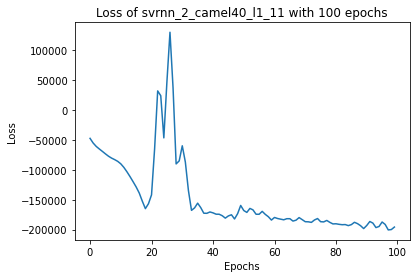

In [13]:
# #* Initialization of the model in an specific epoch
model.to(device)
epoch_init = 100
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device)
loss = plot_loss_epoch(model, path_save,data, epoch_init)
# # loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


In [14]:
# #* Reconstruction
y_ = model.reconstruction(x,y)
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

camel40: SVRNN_2 with  5240 parameters 
 after 100 has an error rate of 0.12123190353673052
 folder svrnn_2_camel40_l1_11


# Other Code
Creation missing labels and plots

In [ ]:
#-------------------------------
# Change the name to create or load the data and models

folder_data = r'C:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\Data\data_mlsp_semi'


x_list = []
y_list = []
# y_list_40 = []
# y_list_60 = []
# y_list_80 = []
# y_list_100 = []


for img in sorted(os.listdir(folder_data)):
    if img.startswith('x'):
        x_list.append(plt.imread(os.path.join(folder_data, img)))
    if img.startswith('y') and not img.endswith('npy'):
        y = plt.imread(os.path.join(folder_data, img))
        y_list.append(y)
        # Only if we want to create the missing labels for different probabilities
#         for p in probabilities:
#             if p == 0.4:
#                 y_list_40.append(create_missing_labels(y, p))
#             elif p == 0.6:
#                 y_list_60.append(create_missing_labels(y, p))
#             elif p == 0.8:
#                 y_list_80.append(create_missing_labels(y, p))
#             elif p == 1:
#                 y_list_100.append(create_missing_labels(y, p))
        
# np.save(os.path.join(general_path, folder_data, 'y_miss_40.npy'), y_list_40)
# np.save(os.path.join(general_path, folder_data, 'y_miss_60.npy'), y_list_60)
# np.save(os.path.join(general_path, folder_data, 'y_miss_80.npy'), y_list_80)
# np.save(os.path.join(general_path, folder_data, 'y_miss_100.npy'), y_list_100)

# Load the created data 
y_list_40 = np.load(os.path.join(general_path, folder_data, 'y_miss_40.npy'))
y_list_60 = np.load(os.path.join(general_path, folder_data, 'y_miss_60.npy'))
y_list_80 = np.load(os.path.join(general_path, folder_data, 'y_miss_80.npy'))
y_list_100 = np.load(os.path.join(general_path, folder_data, 'y_miss_100.npy'))

In [ ]:

fig = plt.figure(figsize=(20, 30))  
rows = len(x_list)
columns = 6
m, n = x_list[0].shape


for i, (x,y, y1,y2,y3, y4) in enumerate(zip(x_list, y_list, y_list_40, y_list_60, y_list_80, y_list_100)):
    print(x.shape)
    fig.add_subplot(rows, columns, columns*i+1)
    x[m-1, n-1] = -1
    plt.imshow(x, cmap='gray')
    plt.title('Image  idex {}'.format(i))
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+2)
    y[m-1, n-1] = -1
    plt.imshow(y, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+3)
    plt.imshow(y1, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+4)
    plt.imshow(y2, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+5)
    plt.imshow(y3, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+6)
    plt.imshow(y4, cmap='gray')



In [ ]:
print('{} has {} parameters to train'.format(model.__class__.__name__ ,num_param(model)) )

In [ ]:
y_ = model.sample(x,y)
image_complete = y_.clone().detach().numpy().reshape(m,n)
image_complete[m-1,n-1] = -1
image_labeled = y_list[idx].copy()
image_labeled[m-1,n-1] = -1
plt.imshow(x_list[idx])
plt.show()
plt.imshow(image_complete)
plt.show()
plt.imshow(image_labeled)
plt.show()
plt.imshow(y_list_80[idx])
plt.show()


unique, counts = np.unique(y_true, return_counts=True)
print(unique, counts)
unique, counts = np.unique(y_pred, return_counts=True)
print(unique, counts)